In [210]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [211]:
# 3.1 Resize training images to 128 x 128

dimension=(128,128)

my_list = []*14 
my_list.append(cv2.imread('car1.jpg'))
my_list.append(cv2.imread('car2.jpg'))
my_list.append(cv2.imread('car3.jpg'))
my_list.append(cv2.imread('car4.jpg'))
my_list.append(cv2.imread('car5.jpg'))
my_list.append(cv2.imread('car6.jpg'))
my_list.append(cv2.imread('car7.jpg'))
my_list.append(cv2.imread('car8.jpg'))
my_list.append(cv2.imread('car9.jpg'))
my_list.append(cv2.imread('car10.jpg'))
my_list.append(cv2.imread('car11.jpg'))
my_list.append(cv2.imread('car12.jpg'))
my_list.append(cv2.imread('car13.jpg'))
my_list.append(cv2.imread('car14.jpg'))

for i in range(len(my_list)):
    my_list[i]= cv2.resize(my_list[i], dimension)

# 3.2 Function to Compute HoG features using cell size of 4  4 pixels
#     block size of2  2 cells and 9 orientation bins    
def hog(images):
    img = cv2.cvtColor(images,cv2.COLOR_BGR2GRAY)
    cell_size = (4, 4)  # h x w in pixels
    block_size = (2, 2)  # h x w in cells
    nbins = 9  # number of orientation bins

# create HoG Object
# winSize is the size of the image cropped to multiple of the cell size
# all arguments should be given in terms of number of pixels
    hog = cv2.HOGDescriptor(_winSize=(img.shape[1] // cell_size[1] * cell_size[1],
                                  img.shape[0] // cell_size[0] * cell_size[0]),
                        _blockSize=(block_size[1] * cell_size[1],
                                    block_size[0] * cell_size[0]),
                        _blockStride=(cell_size[1], cell_size[0]),
                        _cellSize=(cell_size[1], cell_size[0]),
                        _nbins=nbins)

    n_cells = (img.shape[0] // cell_size[0], img.shape[1] // cell_size[1])

# Compute HoG features
    hog_feats = hog.compute(img) \
               .reshape(n_cells[1] - block_size[1] + 1,
                        n_cells[0] - block_size[0] + 1,
                        block_size[1], block_size[0], nbins) \
               .transpose((1, 0, 3, 2, 4))  # index blocks by rows first
    
    return hog_feats


def hog_feat_compute(x):
    lst = []
    num = len(x)
    for n in range(num):
        numbers = hog(x[n-1])
        lst.append(numbers)
    return(lst)

#hog_feat_compute(my_list)

In [212]:
# 3.3 Calculating mean feature map
def hog_mean_feat(y):
    hog_mean_feat = sum(hog_feat_compute(y))/ len(y)
    print(hog_mean_feat)  
    
#hog_mean_feat(my_list)


In [213]:
new_list = [] * 14

new_list.append(cv2.imread('car1.jpg'))
new_list.append(cv2.imread('car2.jpg'))
new_list.append(cv2.imread('car3.jpg'))
new_list.append(cv2.imread('car4.jpg'))
new_list.append(cv2.imread('car5.jpg'))
new_list.append(cv2.imread('car6.jpg'))
new_list.append(cv2.imread('car7.jpg'))
new_list.append(cv2.imread('car8.jpg'))
new_list.append(cv2.imread('car9.jpg'))
new_list.append(cv2.imread('car10.jpg'))
new_list.append(cv2.imread('car11.jpg'))
new_list.append(cv2.imread('car12.jpg'))
new_list.append(cv2.imread('car13.jpg'))
new_list.append(cv2.imread('car14.jpg'))

#flipped around vertical axis
for i in range(len(new_list)):
    new_list[i]= cv2.flip(new_list[i], 1)
    
#Repeating Previous steps
for i in range(len(new_list)):
    new_list[i]= cv2.resize(new_list[i], dimension)
    
hog_feat_compute(new_list)
hog_mean_feat(new_list)    


[[[[[0.09069727 0.04622899 0.07977485 ... 0.13961737 0.10321374
     0.11835776]
    [0.12083566 0.09690094 0.10814827 ... 0.11421776 0.10314468
     0.1298199 ]]

   [[0.09639369 0.06087244 0.11735463 ... 0.17087165 0.15902904
     0.11211409]
    [0.11820559 0.13100678 0.12787369 ... 0.18692636 0.1503342
     0.13748457]]]


  [[[0.08799136 0.08121099 0.09579822 ... 0.0675829  0.06793895
     0.0913628 ]
    [0.1364375  0.12277753 0.15792528 ... 0.10119998 0.06815892
     0.14243345]]

   [[0.10667717 0.12865108 0.11864024 ... 0.11529125 0.07641377
     0.09447654]
    [0.15028922 0.15224436 0.14687459 ... 0.13774665 0.07557295
     0.14792547]]]


  [[[0.14058547 0.09471347 0.12782861 ... 0.07136242 0.03896546
     0.12233203]
    [0.18322721 0.13328983 0.14681289 ... 0.09759901 0.06808427
     0.17512317]]

   [[0.13243075 0.09717346 0.11788062 ... 0.10907097 0.07596505
     0.13228074]
    [0.16532674 0.12805168 0.15357709 ... 0.11875521 0.09929343
     0.17163609]]]


  ...


  [

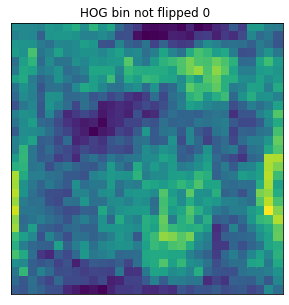

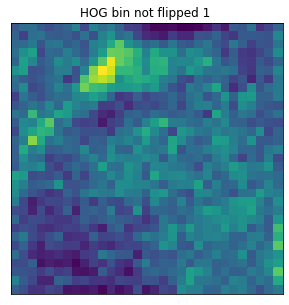

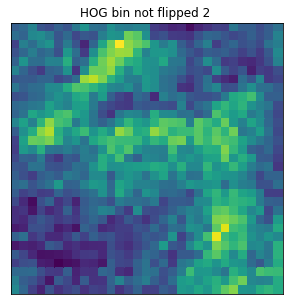

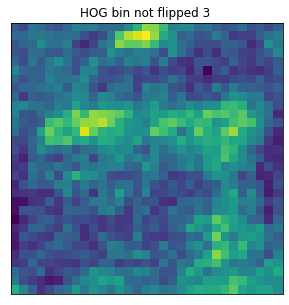

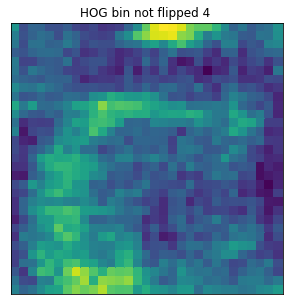

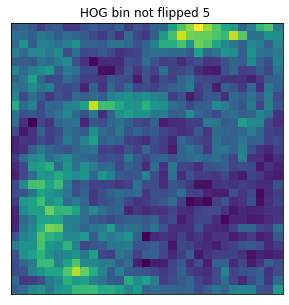

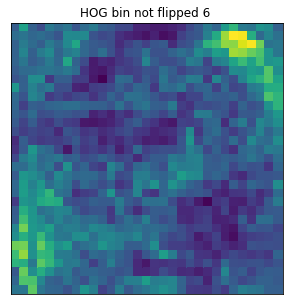

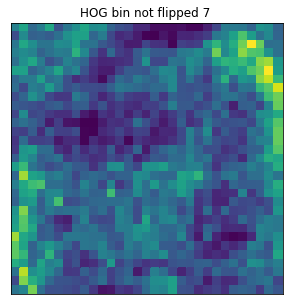

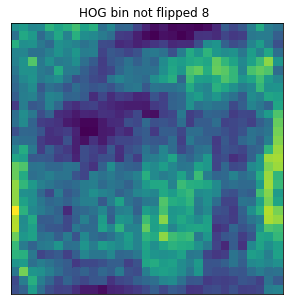

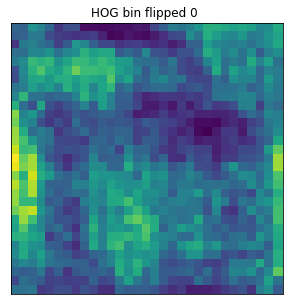

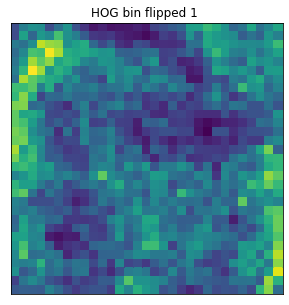

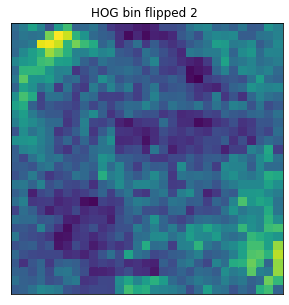

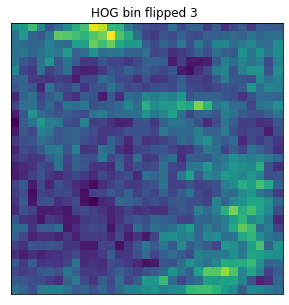

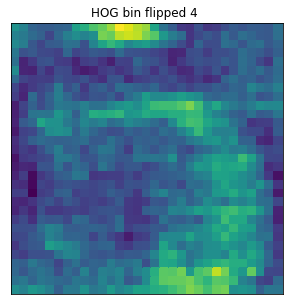

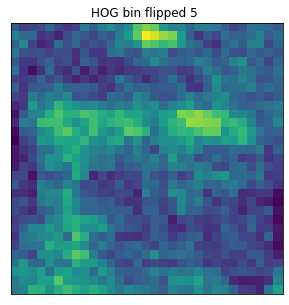

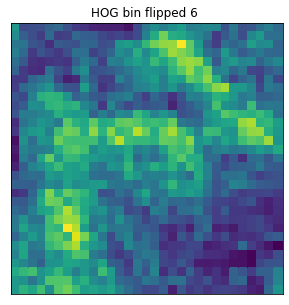

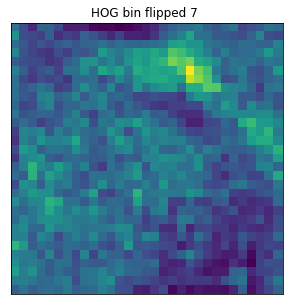

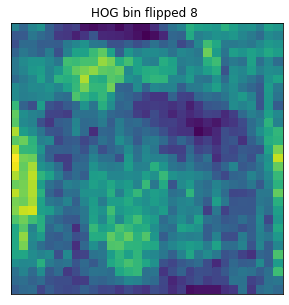

In [214]:
# Display 9 orientation channels

nonflip_disp_meanfeat = (hog(my_list[0]) + hog(my_list[1]) + hog(my_list[2]) +hog(my_list[3]) 
                         + hog(my_list[4]) + hog(my_list[5]) + hog(my_list[6]) + hog(my_list[7]) 
                         + hog(my_list[8])+ hog(my_list[9]) + hog(my_list[10]) + hog(my_list[11])
                         +hog(my_list[12]) + hog(my_list[13]))/len(my_list) 

flip_disp_meanfeat = (hog(new_list[0]) + hog(new_list[1]) + hog(new_list[2]) +hog(new_list[3]) 
                         + hog(new_list[4]) + hog(new_list[5]) + hog(new_list[6]) + hog(new_list[7]) 
                         + hog(new_list[8])+ hog(new_list[9]) + hog(new_list[10]) + hog(new_list[11])
                         +hog(new_list[12]) + hog(new_list[13]))/len(new_list) 


for i in range(9):
    plt.figure(figsize = (5,5))
    plt.pcolor(nonflip_disp_meanfeat[:, :, 0,0,i])
    plt.gca().invert_yaxis()
    plt.gca().set_aspect('equal', adjustable='box')
    plt.title("HOG bin not flipped {} ".format(i)), plt.xticks([]), plt.yticks([])
    

for i in range(9):
    plt.figure(figsize = (5,5))
    plt.pcolor(flip_disp_meanfeat[:, :, 0,0,i])
    plt.gca().invert_yaxis()
    plt.gca().set_aspect('equal', adjustable='box')
    plt.title("HOG bin flipped {} ".format(i)), plt.xticks([]), plt.yticks([])
    
    

In [215]:
# Testing 3.1
# Used the following code from https://medium.com/@muskulpesent/sliding-windows-for-object-detection-with-python-709250eb6161

def sliding_window(image):
    stepSize = 1
    windows = []
    (width, height) = (120, 120) # window size
    for x in range(0, image.shape[1] - width , stepSize):
        for y in range(0, image.shape[0] - height, stepSize):
            window = image[x:x + width, y:y + height, :]
            windows.append((x,y,window))
        return windows    
                          
windows = sliding_window(cv2.imread('test.jpg'))




In [216]:
 # 3.2
dim = (128,128)

for box in windows:
    resized_window = np.resize(box[2],dim)

